In [31]:
from PIL import Image
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

In [32]:
csv_file_path = '../../dataset/aug_splits/1/val.csv'
pic_dir_path = '../../dataset/pictures'

In [33]:
df = pd.read_csv(csv_file_path)
df.head()

,fname,ammonia,chlorophyll,quality,ammonia_bin
0,../../dataset/pics/2020_02_20_3_Treat7_NoBag_2...,3.39,61.36,3,0
1,../../dataset/pics/augs/0-2020_02_20_3_Treat7_...,3.39,61.36,3,0
2,../../dataset/pics/augs/1-2020_02_20_3_Treat7_...,3.39,61.36,3,0
3,../../dataset/pics/augs/2-2020_02_20_3_Treat7_...,3.39,61.36,3,0
4,../../dataset/pics/augs/3-2020_02_20_3_Treat7_...,3.39,61.36,3,0


In [34]:
from agroalimentary_quality_control.modeling.dataset import RocketDataset, ContrastiveRocketDataset
from agroalimentary_quality_control.modeling.regressor import RocketRegressor

In [35]:
dataset = ContrastiveRocketDataset(df, 'ammonia', 'fname', 4, 0.5)
loader = DataLoader(dataset, batch_size=4, shuffle=True)

In [36]:
model = RocketRegressor(1081, '../models/pretrained/mobilenet_v2_weights_best_acc.tar', 'cpu')

  0%|          | 0/162 [00:00<?, ?it/s]

torch.Size([4, 3, 384, 512])
torch.Size([4, 1])
torch.Size([4, 1])


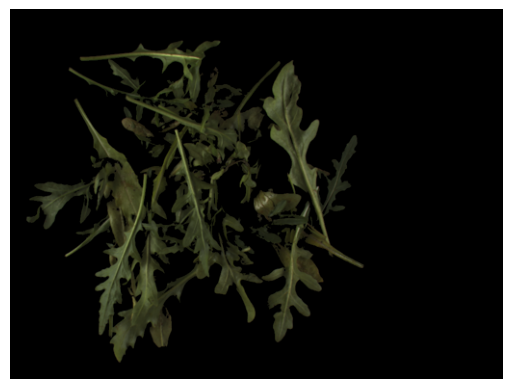

  0%|          | 0/162 [00:01<?, ?it/s]


In [37]:
for current, anchor, negative, target in tqdm(loader):
    print(current.shape)
    pred, _ = model(current)
    print(pred.shape)
    print(target.shape)
    
    negative = negative[0]
    negative = negative.permute(1, 2, 0)
    plt.imshow(negative.numpy())
    plt.axis('off')
    plt.show()
    
    break


In [38]:
import torch
from torch.nn import Module

class RSELoss(Module):
    def __init__(self):
        super(RSELoss, self).__init__()
    
    def forward(self, y_pred, y_true):
        numerator = torch.sum((y_true - y_pred) ** 2)
        denominator = torch.sum((y_true - torch.mean(y_true)) ** 2) + 1e-8
        rse = numerator / denominator
        return rse

rse = RSELoss()

In [39]:
rse(pred, target)

tensor(1.4546, grad_fn=<DivBackward0>)